# Speech DTW 오픈소스 사용
- https://github.com/pchao6/DTWSpeech

### Import

In [2]:
from dtw import dtw
import time
import librosa
import librosa.display
from scipy.spatial.distance import cdist
import pandas as pd
import tqdm
from numpy.linalg import norm

### 데이터 로드 및 전처리(MFCC)

In [7]:
y1, sr1 = librosa.load('data/5_jackson_1.wav')
y2, sr2 = librosa.load('data/6_jackson_6.wav')

In [9]:
# 정규화 함수
# to_mfcc에서 사용
def _normalize(S):
    min_level_db= -100
    return np.clip((S - min_level_db) / -min_level_db, 0, 1)

# mfcc 변환 함수
# mfcc값을 리턴

def to_mfcc(y, sr):
    S = librosa.core.stft(y, n_fft=1024, hop_length=512, win_length=1024)
    D = np.abs(S)**2
    mel_basis = librosa.filters.mel(sr, 1024, n_mels=40)
    mel_S = np.dot(mel_basis, D)
    log_mel_S = librosa.power_to_db(mel_S)
    S = librosa.feature.melspectrogram(y, sr=sr, n_mels = 128)
    log_S = librosa.power_to_db(S, ref=np.max)
    mfcc = librosa.feature.mfcc(S=log_mel_S, n_mfcc=32)
    mfcc = mfcc.astype(np.float32)
    mfcc = _normalize(mfcc)
    
    return mfcc

Populating the interactive namespace from numpy and matplotlib


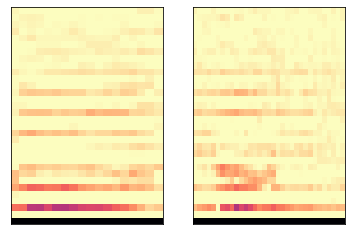

In [10]:
%pylab inline
subplot(1, 2, 1)
#mfcc1 = librosa.feature.mfcc(y1, sr1)
mfcc1 = to_mfcc(y1,sr1)
librosa.display.specshow(mfcc1)

subplot(1, 2, 2)
#mfcc2 = librosa.feature.mfcc(y2, sr2)
mfcc2 = to_mfcc(y2,sr2)
librosa.display.specshow(mfcc2)

### dtw 호출

In [12]:
dist, cost, acc_cost, path = dtw(mfcc1.T, mfcc2.T, dist=lambda x, y: norm(x - y, ord=1))
print('Normalized distance between the two sounds:', dist)

Normalized distance between the two sounds: 0.47004913582521324
